In [66]:
import numpy as np
import matplotlib.pyplot as plt

def DifferentialEquation(y0, t0, tf, h, f, usrinput = None):

    if usrinput is None:
        print("\n 1. Método de Euler. \n 2. RungeKutta2. \n 3. RungeKutta3. \n 4. RungeKutta4. \n")
        usrinput = int(input("Elija qué método desea usar: "))
    
    n = int((tf-t0)/h)
    rng = np.linspace(t0, tf, n+1)
    y_values = np.zeros(n + 1)
    y_values[0] = y0

    if usrinput == 1:
        for i in range(n):
            y_values[i+1] = y_values[i] + (h * f(rng[i], y_values[i]))

    elif usrinput == 2:
        for i in range(n):
            k1 = h * f(rng[i], y_values[i])
            k2 = h * f(rng[i] + (0.5 * h), y_values[i] + (0.5 * k1))
            y_values[i+1] = y_values[i] + k2
            
    elif usrinput == 3:
        for i in range(n):
            k1 = h * f(rng[i], y_values[i])
            k2 = h * f(rng[i] + (0.5 * h), y_values[i] + (0.5 * k1))
            k3 = h * f(rng[i] + h, y_values[i] -k1 + (2 * k2))
            y_values[i+1] = y_values[i] + (1/6) * (k1 + (4 * k2) + k3)
            
    elif usrinput == 4:
        for i in range(n):
            k1 = h * f(rng[i], y_values[i])
            k2 = h * f(rng[i] + (0.5 * h), y_values[i] + (0.5 * k1))
            k3 = h * f(rng[i] + (0.5 * h), y_values[i] + (0.5 * k2))
            k4 = h * f(rng[i] + h, y_values[i] + k3)
            y_values[i+1] = y_values[i] + (1/6) * (k1 + (2 * k2) + (2 * k3) + k4)
    else:
        print("ELija correctamente.")
        return 0
        
    return rng, y_values, usrinput



 1. Método de Euler. 
 2. RungeKutta2. 
 3. RungeKutta3. 
 4. RungeKutta4. 



Elija qué método desea usar:  4


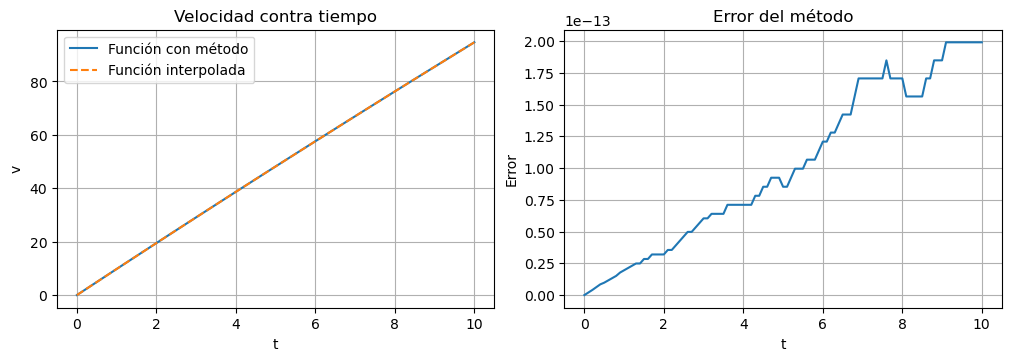

In [67]:
# Primer ejercicio - Resistencia de un cuerpo en función de su velocidad
f = lambda t, v: g - (c/m) * v
g = 9.81
c = 0.5
m = 70
t0 = 0
tf = 10
v0 = 0
h = 1e-1

t, y_values, usrinput = DifferentialEquation(v0, t0, tf, h, f)
t_m, y_values_m, usrinput = DifferentialEquation(v0, t0, tf, h/2, f, usrinput)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t, y_values)
ax[0].plot(t_m, y_values_m, ls = "--")
ax[0].legend(["Función con método", "Función interpolada"])
ax[0].set_title("Velocidad contra tiempo")
ax[0].set_xlabel("t")
ax[0].set_ylabel("v")

y_interpolate = y_values_m[::2]
error = np.abs(y_values - y_interpolate)

ax[1].plot(t, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[0].grid()

ax[1].grid()
plt.show()


 1. Método de Euler. 
 2. RungeKutta2. 
 3. RungeKutta3. 
 4. RungeKutta4. 



Elija qué método desea usar:  4



 1. Método de Euler. 
 2. RungeKutta2. 
 3. RungeKutta3. 
 4. RungeKutta4. 



Elija qué método desea usar:  4


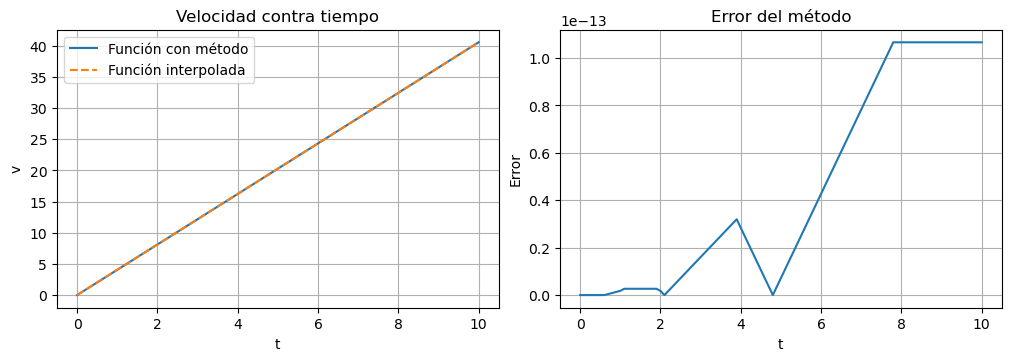

In [54]:
# Segundo ejercicio - Plano Inclinado a 30°

f = lambda t, v: g * (np.sin(np.deg2rad(theta)) - (mu * np.cos(np.deg2rad(theta))))
g = 9.81
theta = 30
mu = 0.1
t0 = 0
tf = 10
v0 = 0
h = 1e-1

t, y_values = DifferentialEquation(v0, t0, tf, h, f)
t_m, y_values_m = DifferentialEquation(v0, t0, tf, h/2, f)

fig, ax = plt.subplots(1, 2, figsize = (10, 3.5), layout = "constrained")

ax[0].plot(t, y_values)
ax[0].plot(t_m, y_values_m, ls = "--")
ax[0].legend(["Función con método", "Función interpolada"])
ax[0].set_title("Velocidad contra tiempo")
ax[0].set_xlabel("t")
ax[0].set_ylabel("v")

y_interpolate = y_values_m[::2]
error = np.abs(y_values - y_interpolate)

ax[1].plot(t, error)
ax[1].set_title("Error del método")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Error")
ax[0].grid()

ax[1].grid()
plt.show()